In [15]:
%matplotlib notebook

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
gdp_path = "Resources/GDP_info _clean.csv"
solarpower_path = "Resources/solar_power_per_country.csv"

# Read the GDP data and the solar power results
gdp_data = pd.read_csv(gdp_path)
solarpower_data = pd.read_csv(solarpower_path)

#Rename Columns, including date columns
gdp_df = gdp_data.rename(columns={"Country Name": "Country", "2016": "2016_GDP", "2017": "2017_GDP", "2018": "2018_GDP", "2019": "2019_GDP","2020": "2020_GDP"})
solarpower_df = solarpower_data.rename(columns={"Country or territory": "Country", "2016_Total": "2016_Solar", "2017_Total": "2017_Solar", "2018_Total": "2018_Solar", "2019_Total": "2019_Solar","2020_Total": "2020_Solar"})

#Drop non-important columns
gdp_df = gdp_df.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
solarpower_df = solarpower_df.drop(columns = ["W per capita 2019", "2016_New", "2017_New", "2018_New", "2019_New", "2020_New", "Share of total consumption %"])

In [17]:
# Combine the data into a single dataset
tonydata_df = pd.merge(gdp_df, solarpower_df, how="inner", on="Country")


#Remove NA values
tonydata_df = tonydata_df.dropna(axis = 0, how ="any", thresh = None, subset = None, inplace=False)


# Display the data table for preview
#data_df.value_counts()

In [18]:
tonydata_df.head()

,Country,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar
0,United Arab Emirates,63968.88804,67183.60531,68576.11552,71150.54214,66746.63494,42.0,255.0,494,1783,2539
1,Argentina,20307.87005,23597.11775,23293.39863,22999.27505,20762.99168,9.0,9.0,191,442,764
2,Australia,47255.30701,48398.54970,50100.22467,52030.64391,52397.38705,5900.0,7200.0,11300,15928,17627
3,Austria,52684.01711,54172.98679,57059.53894,58641.29812,55648.87456,1077.0,1250.0,1431,1578,2220
4,Belgium,48597.39998,50442.27054,52623.55967,54918.16620,52626.58164,3422.0,3800.0,4026,4531,5646


In [19]:
df_tonybar = tonydata_df.set_index("Country")
df_tonybar.head()

,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar
Country,,,,,,,,,,
United Arab Emirates,63968.88804,67183.60531,68576.11552,71150.54214,66746.63494,42.0,255.0,494,1783,2539
Argentina,20307.87005,23597.11775,23293.39863,22999.27505,20762.99168,9.0,9.0,191,442,764
Australia,47255.30701,48398.54970,50100.22467,52030.64391,52397.38705,5900.0,7200.0,11300,15928,17627
Austria,52684.01711,54172.98679,57059.53894,58641.29812,55648.87456,1077.0,1250.0,1431,1578,2220
Belgium,48597.39998,50442.27054,52623.55967,54918.16620,52626.58164,3422.0,3800.0,4026,4531,5646


In [20]:
#finding the highest average for GDP across all years
df_tonybar["average_GDP"]=df_tonybar[["2016_GDP","2017_GDP","2018_GDP","2019_GDP","2020_GDP"]].mean(axis=1)
df_tonybar.head()

,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar,average_GDP
Country,,,,,,,,,,,
United Arab Emirates,63968.88804,67183.60531,68576.11552,71150.54214,66746.63494,42.0,255.0,494,1783,2539,67525.157190
Argentina,20307.87005,23597.11775,23293.39863,22999.27505,20762.99168,9.0,9.0,191,442,764,22192.130632
Australia,47255.30701,48398.54970,50100.22467,52030.64391,52397.38705,5900.0,7200.0,11300,15928,17627,50036.422468
Austria,52684.01711,54172.98679,57059.53894,58641.29812,55648.87456,1077.0,1250.0,1431,1578,2220,55641.343104
Belgium,48597.39998,50442.27054,52623.55967,54918.16620,52626.58164,3422.0,3800.0,4026,4531,5646,51841.595606


In [21]:
#sorting by the highest average GDP per country
df_tonybar=df_tonybar.sort_values(by="average_GDP",ascending=False)
df_tonybar.head()

,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar,average_GDP
Country,,,,,,,,,,,
Luxembourg,113365.17610,114985.84220,117245.27890,119415.46980,118503.55100,122.0,127.0,134,150,195,116703.063600
Singapore,89417.34902,95350.43567,100581.15800,102573.40180,98483.34200,97.0,118.0,160,255,329,97281.137298
Switzerland,68105.15498,69103.57026,71671.51508,73143.75816,71760.58621,1640.0,1900.0,2246,2524,3118,70756.916938
United Arab Emirates,63968.88804,67183.60531,68576.11552,71150.54214,66746.63494,42.0,255.0,494,1783,2539,67525.157190
Norway,58939.91261,64050.75617,69710.48451,68345.06942,63287.60701,27.0,45.0,68,90,152,64866.765944


<IPython.core.display.Javascript object>


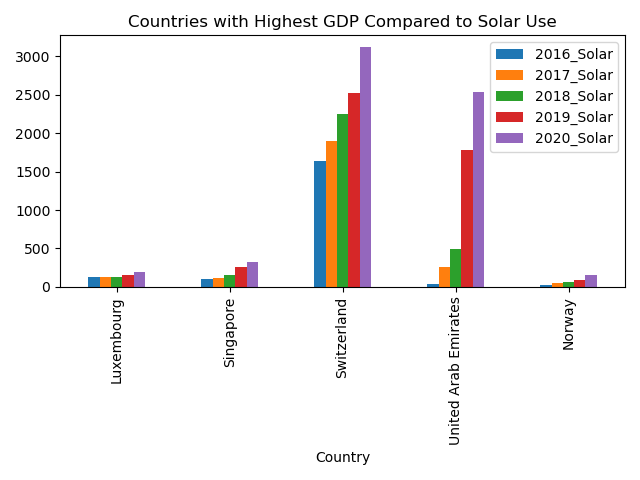

In [22]:
# Graphing Countries with Highest GDP Compared to Solar Use
df_tonybar.iloc[0:5,5:10].plot(kind="bar",title="Countries with Highest GDP Compared to Solar Use")
plt.tight_layout()

In [21]:
plt.close()

In [25]:
#finding the lowest average for GDP across all years
df_tonybar=df_tonybar.sort_values(by="average_GDP",ascending=True)
df_tonybar.head()

,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar,average_GDP
Country,,,,,,,,,,,
Senegal,3075.937351,3203.906368,3388.946311,3503.617548,3501.515601,43.0,113.0,134,134,155,3334.784636
Cambodia,3675.038620,3928.373934,4259.203119,4574.403027,4419.834110,18.0,29.0,29,99,208,4171.370562
Kenya,3930.893858,4203.585011,4443.179109,4641.080377,4576.200469,32.0,39.0,105,106,106,4358.987765
Bangladesh,3848.957664,4160.703325,4547.480016,4954.761848,5136.739645,161.0,185.0,201,284,301,4529.728500
Pakistan,4410.006565,4571.205078,4853.266557,4896.393145,4811.097563,589.0,655.0,679,713,737,4708.393782


<IPython.core.display.Javascript object>


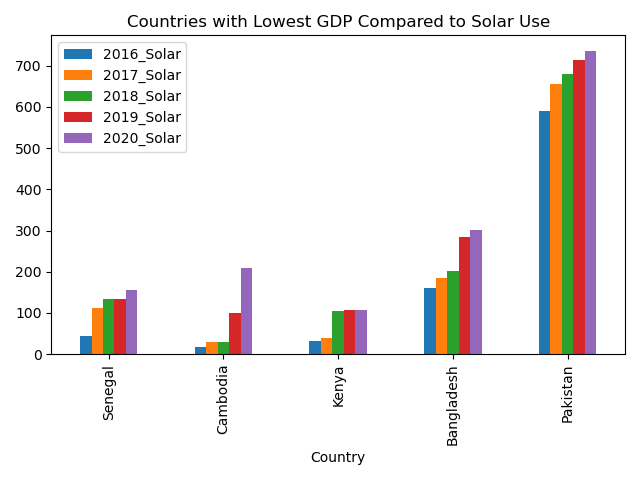

In [31]:
#sorting by the lowest average GDP per country
df_tonybar.iloc[0:5,5:10].plot(kind="bar",title="Countries with Lowest GDP Compared to Solar Use")
plt.tight_layout()

In [27]:
plt.close()

In [28]:
#df_tonybar.iloc[:,0].apply(np.max)

In [29]:
#df_tonybar.iloc[:,0:5].apply(np.min)

In [30]:
#tony_plot = df_tonybar.plot(kind='bar',title="GDP by Country")
#tony_plot.set_xlabel("Countries")
#tony_plot.set_ylabel("Gross Domestic Product - By Year")